<a href="https://colab.research.google.com/github/meriemdouider1/data_mining_project/blob/main/26%20version%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [157]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pandas_profiling
import os
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.linear_model import LassoCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split,StratifiedShuffleSplit,StratifiedKFold
from sklearn import preprocessing
import operator
from sklearn.ensemble import RandomForestClassifier

import lightgbm as lgb
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE #Over sampling
import numpy as np
import time 
from itertools import cycle

from sklearn.model_selection import GridSearchCV
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
from scipy import interp

from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve, f1_score, auc


# Load classifiers
# ----------------
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from yellowbrick.classifier import ClassificationReport
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
import xgboost as xgb
from xgboost import XGBClassifier

#Reading data

In [158]:
Questionnaire = '/content/Questionnaire.xlsx'
d_Questionnaire= pd.read_excel(Questionnaire,
sheet_name=0,
header=0,
index_col=False,
keep_default_na=True
)

In [159]:
Démographie  = '/content/Demographie.xlsx'
d_Démographie= pd.read_excel(Démographie,
sheet_name=0,
header=0,
index_col=False,
keep_default_na=True
)

In [160]:
examination = '/content/examination.xlsx'
d_examination= pd.read_excel(examination,
sheet_name=0,
header=0,
index_col=False,
keep_default_na=True
)

In [161]:
lab  = '/content/labf.xlsx'
d_lab= pd.read_excel(lab,
sheet_name=0,
header=0,
index_col=False,
keep_default_na=True
)

#Dividing categorical and numerical

In [162]:
def split_columns(df):
    col = [c for c in df.columns if c not in ['SEQN']]
    numclasses=[]
    for c in col:
        numclasses.append(len(df[c].unique()))
    threshold=10
    np.array(numclasses).size
    categorical_variables = list(np.array(col)[np.array(numclasses) < threshold])
    numerical_variables = set(df.columns)^set(categorical_variables)
    return categorical_variables, numerical_variables

In [163]:
#questionaire data
ques_cat, ques_cont = split_columns(d_Questionnaire)
ques_obj = d_Questionnaire[list(ques_cont)].select_dtypes(include=['object']).columns
ques_cont = set(ques_cont)^set(ques_obj)


In [164]:
ques_cat

['DIQ010', 'DIQ160', 'DIQ170', 'DIQ172', 'DIQ180', 'DIQ050']

In [165]:
ques_obj

Index([], dtype='object')

In [166]:
ques_cont

{'SEQN'}

In [167]:
#demographic data
demo_cat, demo_cont = split_columns(d_Démographie)
demo_obj = d_Démographie[list(demo_cont)].select_dtypes(include=['object']).columns
demo_cont = set(demo_cont)^set(demo_obj)
#exam data
exam_cat, exam_cont = split_columns(d_examination)
exam_obj = d_examination[list(exam_cont)].select_dtypes(include=['object']).columns
exam_cont = set(exam_cont)^set(exam_obj)
#labs data
labs_cat, labs_cont = split_columns(d_lab)
labs_obj = d_lab[list(labs_cont)].select_dtypes(include=['object']).columns
labs_cont = set(labs_cont)^set(labs_obj)

In [168]:
#assert check whether we have covered all the features
assert len(ques_cat) + len(ques_cont) +len(ques_obj)  == len(d_Questionnaire.columns)
assert len(demo_cat) + len(demo_cont) +len(demo_obj) == len(d_Démographie.columns)
assert len(exam_cat) + len(exam_cont) +len(exam_obj) == len(d_examination.columns)
assert len(labs_cat) + len(labs_cont) +len(labs_obj) == len(d_lab.columns)

#Combining and Merging dataframes into single df

In [169]:
#nhs_diet
d_examination.drop(['SEQN'], axis = 1, inplace=True)
d_lab.drop(['SEQN'], axis = 1, inplace=True)
d_Questionnaire.drop(['SEQN'], axis = 1, inplace=True)

#joining all dataframes into single

df = pd.concat([d_Démographie, d_examination], axis=1, join='inner')
df = pd.concat([df, d_lab], axis=1, join='inner')
df = pd.concat([df, d_Questionnaire], axis=1, join='inner')

In [170]:
df.head()

,SEQN,RIDSTATR,RIAGENDR,RIDAGEYR,RIDRETH1,RIDRETH3,RIDEXMON,DMDBORN4,DMDCITZN,DMDEDUC2,DMDMARTL,SIALANG,SIAPROXY,SIAINTRP,FIALANG,FIAPROXY,FIAINTRP,MIALANG,MIAPROXY,MIAINTRP,DMDHHSIZ,DMDFMSIZ,DMDHHSZA,DMDHHSZB,DMDHHSZE,DMDHRGND,DMDHRAGZ,DMDHREDZ,DMDHRMAZ,DMDHSEDZ,WTINT2YR,WTMEC2YR,SDMVPSU,SDMVSTRA,INDHHIN2,INDFMIN2,INDFMPIR,BMDSTATS,BMXWT,BMXHT,...,LBXBAPCT,LBDLYMNO,LBDMONO,LBDNENO,LBDEONO,LBDBANO,LBXRBCSI,LBXHGB,LBXHCT,LBXMCVSI,LBXMCHSI,LBXMC,LBXRDW,LBXPLTSI,LBXMPSI,LBXNRBC,LBXBCR,LBDBCRSI,LBDBCRLC,LBXBCO,LBDBCOSI,LBDBCOLC,LBDSF5LC,LBXSF6SI,LBDSF6LC,LBXGH,WTSAF2YR,LBXGLU,LBDGLUSI,LBDHDD,LBDHDDSI,LBXHA,LBXHBC,LBXHBS,DIQ010,DIQ160,DIQ170,DIQ172,DIQ180,DIQ050
0,93703,2,2,2,5,6,2,1,1,4,1,1,1,2,1,2,2,1,2,2,5,5,3,0,0,1,2,3,1,3,9246.491865,8539.731348,2,145,15,15,5.00,1,13.7,88.6,...,1.0,3.4,0.6,4.2,0.2,0.1,5.48,11.9,36.7,67.0,21.7,32.4,15.6,309,7.9,0.0,0.29,5.58,1,0.20,3.39,0,1,1.160,0,6.2,0.000000,97,5.38,60,1.55,1,1,1,2,2,2,2,2,2
1,93704,2,1,2,3,3,1,1,1,4,1,1,1,2,1,2,2,1,2,2,4,4,2,0,0,1,2,3,1,2,37338.768343,42566.614750,1,143,15,15,5.00,1,13.9,94.2,...,0.8,1.5,0.6,3.7,0.3,0.0,5.24,16.3,47.0,89.7,31.1,34.7,12.2,233,6.6,0.0,0.29,5.58,1,0.14,2.38,0,1,0.831,0,5.2,0.000000,97,5.38,47,1.22,2,2,2,2,2,2,2,2,2
2,93705,2,2,66,4,4,2,1,1,2,3,1,2,2,1,2,2,1,2,2,1,1,0,0,1,2,4,1,2,2,8614.571172,8338.419786,2,145,3,3,0.82,1,79.5,158.3,...,0.5,4.2,0.7,6.1,0.2,0.1,5.02,14.5,42.1,83.9,28.9,34.4,13.6,348,8.5,0.2,0.29,5.58,1,0.14,2.38,0,1,3.620,0,5.6,0.000000,97,5.38,68,1.76,2,2,2,2,2,2,2,1,2
3,93706,2,1,18,5,6,2,1,1,4,1,1,2,2,1,2,2,1,2,2,5,5,0,0,1,1,4,3,1,2,8548.632619,8723.439814,2,134,15,15,5.00,1,66.3,175.7,...,0.7,1.9,0.4,3.6,0.1,0.0,4.59,13.2,39.9,86.8,28.8,33.1,13.4,226,9.1,0.2,0.29,5.58,1,0.16,2.72,0,0,1.220,0,6.2,25653.677102,122,6.77,88,2.28,1,1,1,2,2,2,2,2,2
4,93707,2,1,13,5,7,2,1,1,4,1,1,1,2,1,2,2,1,2,2,7,7,0,3,0,1,3,2,1,3,6769.344567,7064.609730,1,138,10,10,1.88,1,45.4,158.4,...,0.6,1.9,0.5,4.8,0.1,0.0,5.13,15.4,45.5,88.8,30.0,33.8,15.7,228,9.0,0.0,0.70,13.46,0,0.34,5.77,0,1,1.940,0,6.3,0.000000,97,5.38,65,1.68,1,2,2,2,2,2,2,2,2


In [171]:
df.shape

(7936, 370)

In [172]:
df.describe()

,SEQN,RIDSTATR,RIAGENDR,RIDAGEYR,RIDRETH1,RIDRETH3,RIDEXMON,DMDBORN4,DMDCITZN,DMDEDUC2,DMDMARTL,SIALANG,SIAPROXY,SIAINTRP,FIALANG,FIAPROXY,FIAINTRP,MIALANG,MIAPROXY,MIAINTRP,DMDHHSIZ,DMDFMSIZ,DMDHHSZA,DMDHHSZB,DMDHHSZE,DMDHRGND,DMDHRAGZ,DMDHREDZ,DMDHRMAZ,DMDHSEDZ,WTINT2YR,WTMEC2YR,SDMVPSU,SDMVSTRA,INDHHIN2,INDFMIN2,INDFMPIR,BMDSTATS,BMXWT,BMXHT,...,LBXBAPCT,LBDLYMNO,LBDMONO,LBDNENO,LBDEONO,LBDBANO,LBXRBCSI,LBXHGB,LBXHCT,LBXMCVSI,LBXMCHSI,LBXMC,LBXRDW,LBXPLTSI,LBXMPSI,LBXNRBC,LBXBCR,LBDBCRSI,LBDBCRLC,LBXBCO,LBDBCOSI,LBDBCOLC,LBDSF5LC,LBXSF6SI,LBDSF6LC,LBXGH,WTSAF2YR,LBXGLU,LBDGLUSI,LBDHDD,LBDHDDSI,LBXHA,LBXHBC,LBXHBS,DIQ010,DIQ160,DIQ170,DIQ172,DIQ180,DIQ050
count,7936.000000,7936.000000,7936.000000,7936.000000,7936.000000,7936.000000,7936.000000,7936.000000,7936.000000,7936.000000,7936.000000,7936.000000,7936.000000,7936.000000,7936.000000,7936.000000,7936.000000,7936.000000,7936.000000,7936.000000,7936.000000,7936.000000,7936.000000,7936.000000,7936.000000,7936.000000,7936.000000,7936.000000,7936.000000,7936.000000,7936.000000,7936.000000,7936.000000,7936.000000,7936.000000,7936.000000,7936.000000,7936.000000,7936.000000,7936.000000,...,7936.000000,7936.000000,7936.000000,7936.000000,7936.000000,7936.000000,7936.000000,7936.000000,7936.000000,7936.000000,7936.000000,7936.000000,7936.000000,7936.000000,7936.000000,7936.00000,7936.000000,7936.000000,7936.000000,7936.000000,7936.000000,7936.000000,7936.000000,7936.000000,7936.0,7936.000000,7936.000000,7936.000000,7936.000000,7936.000000,7936.000000,7936.000000,7936.000000,7936.000000,7936.000000,7936.000000,7936.000000,7936.000000,7936.000000,7936.000000
mean,97670.500000,1.942414,1.511341,34.363029,3.235761,3.500378,1.543221,1.243826,1.117692,3.714214,2.021421,1.102949,1.657132,1.967112,1.091230,1.998236,1.972656,1.051537,1.994330,1.983619,3.710559,3.589214,0.494960,0.877772,0.489541,1.498614,2.862273,2.047001,1.463458,2.057208,34658.037726,34695.011004,1.517641,140.990927,12.567540,12.326865,2.719984,1.134955,64.789491,156.791898,...,0.754687,2.383606,0.575290,4.033556,0.204360,0.045917,4.742344,13.737273,40.903919,86.916003,29.231578,33.578427,13.735522,255.413306,8.091520,0.08503,0.317840,6.115190,0.946069,0.173364,2.944803,0.003780,0.937122,1.462138,0.0,5.681502,34331.708539,102.392641,5.680988,52.578503,1.359638,1.338080,1.948841,1.732863,1.923891,1.939012,1.908518,1.879032,1.844380,1.972530
std,2291.070201,0.232973,0.499903,25.503013,1.281829,1.705324,0.498160,1.679004,0.466398,0.987753,2.638199,0.303911,0.474698,0.178355,0.287954,0.041967,0.163093,0.221105,0.075093,0.126944,1.711820,1.755174,0.801998,1.061169,0.752156,0.500030,0.807843,0.637563,0.718063,0.497762,41429.214937,43485.753638,0.499720,4.199099,16.781947,16.758066,1.737661,0.502854,32.681992,21.463467,...,0.316667,4.174485,0.202014,1.654518,0.180871,0.051771,0.462687,1.445707,3.967844,6.138082,2.395057,0.892629,1.216110,65.320742,0.869265,0.07614,0.213558,4.106382,0.225897,0.324093,5.499527,0.061371,0.242759,1.357807,0.0,0.919355,80520.565172,22.596598,1.255185,13.723671,0.354919,0.473352,0.220908,0.442492,0.373007,0.326614,0.450664,0.730458,1.136927,0.183782
min,93703.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2571.068712,0.000000,1.000000,134.000000,1.000000,1.000000,0.000000,1.000000,3.200000,78.300000,...,0.100000,0.400000,0.100000,0.400000,0.000000,0.000000,2.320000,6.400000,23.000000,35.400000,12.400000,25.200000,11.300000,8.000000,5.400000,0.00000,0.290000,5.580000,0.000000,0.040000,0.680000,0.000000,0.000000,0.113000,0.0,3.800000,0.000000,47.000000,2.610000,10.000000,0.260000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,95686.750000,2.000000,1.000000,11.000000,3.000000,3.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,2.

**tInitial cleaning - Removing na's if in rows and columns from the merged dataframe** 

In [173]:
lst = df.columns[df.isna().all()].tolist()
df.dropna(axis=1, how='all',inplace=True)
df.dropna(axis=0, how='all',inplace=True)
df.shape

(7936, 370)

****Output label assignment****

In [174]:
df.loc[(df['LBXGLU'] < 100) , 'Diabetes'] = 0
df.loc[((df['LBXGLU'] >= 100) & (df['LBXGH'] <= 125)) , 'Diabetes'] = 1
df.loc[(df['LBXGLU'] > 125) , 'Diabetes'] = 2

In [175]:
df.loc[((df.Diabetes.isna()) & (df.DIQ010 == 1)), 'Diabetes'] = 2
df.loc[((df.Diabetes.isna()) & (df.DIQ010 == 3)), 'Diabetes'] = 1
df.loc[((df.Diabetes.isna()) & (df.DIQ010 == 2)), 'Diabetes'] = 0

In [176]:
##removing the rows with nan diabetes values 
df = df[np.isfinite(df['Diabetes'])]

In [177]:
df.shape

(7936, 371)

In [178]:
df.Diabetes.value_counts()

0.0    6180
1.0    1346
2.0     410
Name: Diabetes, dtype: int64

Text(0, 0.5, 'Number of counts')

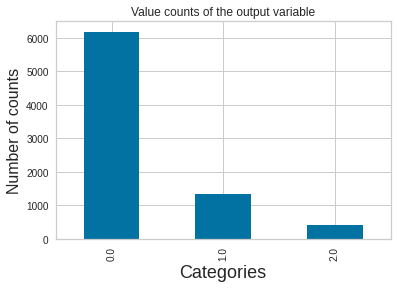

In [179]:
pd.value_counts(df['Diabetes']).plot(kind="bar", title='Value counts of the output variable')
plt.xlabel('Categories', fontsize=18)
plt.ylabel('Number of counts', fontsize=16)

#Dividing the merged df variables

In [180]:
cat_vars = ques_cat+demo_cat+exam_cat+labs_cat
cat_vars = [x for x in cat_vars if x not in lst]
num_vars = list(ques_cont)+list(demo_cont)+list(exam_cont)+list(labs_cont)
num_vars = [x for x in num_vars if x not in lst]
obj_vars = list(set(df.columns)^set(cat_vars)^set(num_vars))

**Dimensionality Reduction and variance check using PCA**

In [181]:
X = df.drop(labels = ['Diabetes','LBXGLU','DIQ010','DIQ160'], axis=1).values
y = df['Diabetes'].values
X = StandardScaler().fit_transform(X)

In [182]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, df[['Diabetes']]], axis = 1)

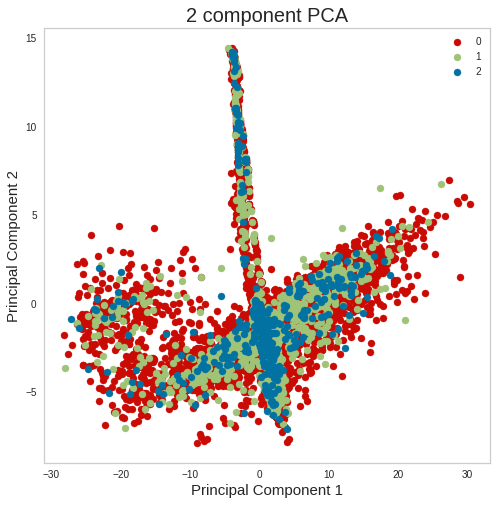

In [183]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0,1,2]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Diabetes'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [184]:
pca.explained_variance_ratio_

array([0.14990355, 0.06226945])

In [185]:
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3'])
finalDf = pd.concat([principalDf, df[['Diabetes']]], axis = 1)

In [186]:
pca.explained_variance_ratio_

array([0.14990355, 0.06226945, 0.04463875])

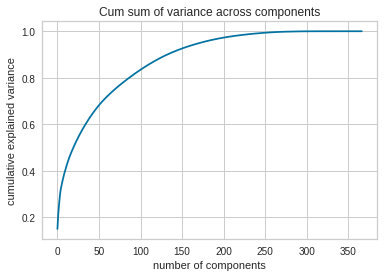

In [187]:
## obtain all the components and plot the cumulatie explained variance with respect to the number of components
pca =  PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('Cum sum of variance across components')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

Après avoir tracé la somme cumulée de la variance sur le nombre de composants, pour obtenir une variance de 90%, nous devrions utiliser au moins 150 caractéristiques, ce qui est très proche de notre taille réelle. Nous ne procédons pas à une réduction de dimensionnalité maintenant.

#Feature Selection using various ML models

**Linear regression with lasso**

In [188]:
reg = LassoCV(cv=5, random_state=0).fit(X, y)
reg.score(X, y)


0.5965747545748417

In [189]:
(reg.coef_)

array([ 9.90411020e-04,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  1.84596829e-04, -1.52917390e-03,
        1.75697110e-03, -3.21338856e-06, -2.82760029e-03, -1.85547124e-03,
       -1.75554551e-03, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -4.79959908e-03, -2.97653480e-04, -9.42392351e-05,
       -0.00000000e+00, -7.55854043e-03,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -4.02533027e-04, -0.00000000e+00, -5.78356251e-04,
       -5.85993672e-03, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  5.77337564e-03,  0.00000000e+00,
       -1.61328455e-03, -2.76147308e-03, -0.00000000e+00, -0.00000000e+00,
       -3.18649379e-03, -2.12445384e-03,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -5.68753858e-04, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -1.10139329e-03, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  

In [190]:
coefficients = pd.concat([pd.DataFrame(df.columns),pd.DataFrame(np.transpose(reg.coef_))], axis = 1)

In [191]:
coefficients.columns = ['column','coeff']

In [192]:
lasso_75 = coefficients.sort_values('coeff',ascending = False).head(75)
features_lasso = list(lasso_75.column)
features_lasso[:21]

['LBXGLU',
 'WTSAF2YR',
 'LBXSNASI',
 'LBXSGB',
 'LBXSUA',
 'LBXHCT',
 'LBXSBU',
 'LBXSATSI',
 'LBXRDW',
 'LBXEOPCT',
 'OHX23CTC',
 'LBXSTB',
 'LBXSAPSI',
 'LBXMCVSI',
 'LBXMPSI',
 'OHX29SE',
 'LBXBAPCT',
 'OHX19TC',
 'LUXCPIQR',
 'URXUCR',
 'LBXSIR']

**Random forests for predicting top 25 features**

In [193]:
param_grid = dict()
clf = RandomForestClassifier(n_estimators=500, random_state=0)
grid_search = GridSearchCV(clf, param_grid=param_grid, verbose=3,scoring='accuracy').fit(X, list(y))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV]  ................................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................................... , score=0.994, total=  14.6s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   14.6s remaining:    0.0s


[CV] .................................... , score=0.989, total=  14.7s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   29.3s remaining:    0.0s


[CV] .................................... , score=0.994, total=  14.9s
[CV]  ................................................................
[CV] .................................... , score=0.991, total=  14.7s
[CV]  ................................................................
[CV] .................................... , score=0.991, total=  14.6s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.2min finished


In [194]:
clf = grid_search.best_estimator_
clf.fit(X,list(y))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [195]:
d = {}
for feature in zip(df.columns,clf.feature_importances_):
    d[feature[0]]=feature[1]
    

sorted_d = sorted(d.items(), key=operator.itemgetter(1),reverse=True)
dic = sorted_d[:75]
lst_rf = list(zip(*dic))

In [196]:
features_rf = lst_rf[0]
features_rf[:25]

('LBXGLU',
 'WTSAF2YR',
 'LBXSGL',
 'LBDSGLSI',
 'LBXGH',
 'LBXSGTSI',
 'LBXHCT',
 'LBDSUASI',
 'LBXSTR',
 'LBXSUA',
 'LBXSOSSI',
 'LBXSPH',
 'LBDSPHSI',
 'LBXSATSI',
 'LBDSTRSI',
 'LBXRBCSI',
 'LBXSF6SI',
 'LBXSCK',
 'LBXHGB',
 'LBXWBCSI',
 'LBXSIR',
 'URDACT',
 'LBDSIRSI',
 'LBDLYMNO',
 'LBXBCO')

**Using complex wrapper methods- RandomForests with Boruta**

Modifying the random forests using Boruta. This is a good model for categorical features as 70% of our features are categorical. For each iteration, Boruta goes through the features and either accept or reject them.!!!!!!!!!!!!!!!!

In [197]:
pip install Boruta

In [198]:
from boruta import BorutaPy

In [199]:
import imp
import sys

In [202]:
rfc = RandomForestClassifier(n_estimators=15, n_jobs=4, class_weight='balanced', max_depth=6)
boruta_selector = BorutaPy(rfc, n_estimators='auto', verbose=2)
df2 = df.drop(labels = ['Diabetes','LBXGLU','DIQ010','SEQN','DIQ160'],axis=1)

x=df2.values
boruta_selector.fit(x,list(df['Diabetes'].values))
print (boruta_selector.n_features_)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	366
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	366
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	366
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	366
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	366
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	366
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	366
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	63
Tentative: 	6
Rejected: 	297
Iteration: 	9 / 100
Confirmed: 	63
Tentative: 	6
Rejected: 	297
Iteration: 	10 / 100
Confirmed: 	63
Tentative: 	6
Rejected: 	297
Iteration: 	11 / 100
Confirmed: 	63
Tentative: 	6
Rejected: 	297
Iteration: 	12 / 100
Confirmed: 	63
Tentative: 	6
Rejected: 	297
Iteration: 	13 / 100
Confirmed: 	63
Tentative: 	6
Rejected: 	297
Iteration: 	14 / 100
Confirmed: 	63
Tentative: 	6
Rejected: 	297
Iteration: 	15 / 100
Confirmed: 	63
Tentative: 	5
Rejected: 	298
Iteration: 	16 / 100
Confirmed: 	63
Tenta

In [203]:
(boruta_selector.ranking_).shape
print ('\n Top %d features:' % boruta_selector.n_features_)
df_boruta = df2.head(boruta_selector.n_features_)
features_boruta = df_boruta.columns


 Top 63 features:


In [204]:
boruta_selector.ranking_

array([248, 207,  19, 160, 117, 209, 221, 247, 172, 158, 260, 261, 275,
       252, 289, 270, 291, 294, 285, 133, 104, 178, 174, 155, 238, 170,
       186, 191, 195,   2,   5, 219, 100,  83, 107,  37, 255,  21,  10,
        23,   8,  12,  25,  14,  26, 295, 209,  36, 290, 299, 143,  34,
        17, 299,  11,  27, 286,  46,  24, 292, 245, 284, 152, 144, 133,
       141, 132, 122, 122,  59, 109, 242, 283, 129, 163, 119, 126,  98,
       146, 135, 137, 131, 140, 138, 128, 175, 267,  43,  49,  27, 265,
        71,  90,  54,  81,  48, 194,  89,  13,  56, 193,  49,  70,  55,
        62,  30, 205,  51,  53,  91, 197,  97, 113, 130, 120,  42, 258,
        65,  63,  77, 209,  52,  93,  96, 102,  37, 182,  69,  91,  85,
       181,  73, 109, 125, 113,  46,   7,  66, 136,  63,  83,  77,  22,
        68,  81,  32, 107,  88,  33,  79,  99, 211,  44,  66,  75, 222,
        35,  94, 118, 103,  41,  57,  81, 112,  87, 116, 115,  77,  29,
        73,  86, 111,  58, 101,  94, 122,  46, 263,   5, 197, 15

**Lightbgm**

LightGBM is one of the best performers for categorical features. This is the reason we are using it for better performance.

Plot feature importances…


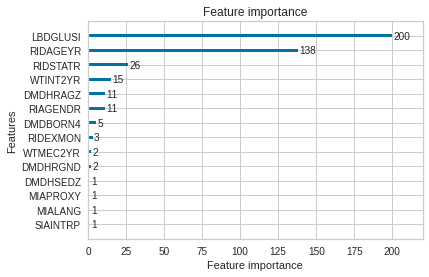

In [205]:
df_new = df.drop(labels = ['Diabetes','LBXGLU','DIQ010','SEQN','DIQ160'], axis=1)
ob_vars = df_new.select_dtypes(include=['object'])
for i in ob_vars:
    df_new[i] = df_new[i].astype(str).astype(float)
lbg_cat_vars = list(set(cat_vars)^set(['LBXGLU','DIQ160','DIQ010']))
lst = ['LBXGLU','DIQ160','DIQ010']
lbg_cat_vars.remove('LBXGLU')
d_train = lgb.Dataset(df_new, label=df['Diabetes'])
param = {'max_depth': 5, 'learning_rate' : 0.1, 'num_leaves': 900, 'n_estimators': 100}
model2 = lgb.train(params=param,train_set=d_train, categorical_feature=lbg_cat_vars)
print('Plot feature importances…')
ax = lgb.plot_importance(model2, max_num_features=20)
plt.show()

In [211]:
lst = []
for f in range(len(model2.feature_importance())):
    val=list(model2.feature_importance())[f]
    if val!=0:
        lst.append(list(model2.feature_name())[list(model2.feature_importance()).index(val)])

In [212]:
features_lgb = list(set(lst))

In [213]:
features_lgb

['RIAGENDR',
 'DMDHRGND',
 'RIDAGEYR',
 'SIAINTRP',
 'RIDSTATR',
 'WTINT2YR',
 'DMDBORN4',
 'RIDEXMON',
 'LBDGLUSI']

**Final Selecting features from the above models**

In [299]:
features = [features_lasso, features_rf, features_boruta, features_lgb]

In [300]:
features_boruta

Index(['RIDSTATR', 'RIAGENDR', 'RIDAGEYR', 'RIDRETH1', 'RIDRETH3', 'RIDEXMON',
       'DMDBORN4', 'DMDCITZN', 'DMDEDUC2', 'DMDMARTL',
       ...
       'LBDGLUSI', 'LBDHDD', 'LBDHDDSI', 'LBXHA', 'LBXHBC', 'LBXHBS', 'DIQ170',
       'DIQ172', 'DIQ180', 'DIQ050'],
      dtype='object', length=366)

In [303]:
list(set(features_lasso))

['LBXSBU',
 'OHX10TC',
 'BPXSY3',
 'INDHHIN2',
 'OHX29SE',
 'OHX19TC',
 'LBDSIRSI',
 'OHX25TC',
 'LBXSNASI',
 'OHX07CTC',
 'OHX19CTC',
 'LBXSATSI',
 'DIQ010',
 'OHX13CTC',
 'OHX04CTC',
 'OHX24TC',
 'OHX25CTC',
 'Unnamed: 0',
 'OHX03CTC',
 'OHX11CTC',
 'OHX26TC',
 'OHX23CTC',
 'LBXSTB',
 'OHX02CTC',
 'DXXWDBMC',
 'LBXSC3SI',
 'URXCRS',
 'OHX21CTC',
 'LBXSCK',
 'OHX29TC',
 'OHX12CTC',
 'LBXSUA',
 'OHX27TC',
 'DMDCITZN',
 'WTSAF2YR',
 'DXDSTLE',
 'OHXRRESO',
 'OHX18CTC',
 'OHX10CTC',
 'OHX05CTC',
 'LBXSAPSI',
 'LBXSIR',
 'OHX22CTC',
 'DXDTOBMD',
 'URXUCR',
 'LBXMOPCT',
 'LUXSIQRM',
 'DXXPEBMD',
 'LBXBAPCT',
 'DXXL3A',
 'LBDSGBSI',
 'OHX30TC',
 'OHX31TC',
 'OHX06CTC',
 'LUANMVGP',
 'LBDSUASI',
 'LBXMCVSI',
 'OHX20TC',
 'OHX28TC',
 'OHX08CTC',
 'LBXMPSI',
 'LBXEOPCT',
 'LBDSBUSI',
 'OHX31SE',
 'OHX12SE',
 'LBXSGB',
 'LBXRDW',
 'LBXHCT',
 'LBXGLU',
 'LUXSIQR',
 'LUXCPIQR',
 'SEQN',
 'RIDEXMON',
 'LBXHBC',
 'OHX14CTC']

In [304]:
list(set(features_lasso))
selected_features= ['LBXSBU',
 'OHX10TC',
 'BPXSY3',
 'INDHHIN2',
 'OHX29SE',
 'OHX19TC',
 'LBDSIRSI',
 'OHX25TC',
 'LBXSNASI',
 'OHX07CTC',
 'OHX19CTC',
 'LBXSATSI',
 'DIQ010',
 'OHX13CTC',
 'OHX04CTC',
 'OHX24TC',
 'OHX25CTC',
 'Unnamed: 0',
 'OHX03CTC',
 'OHX11CTC',
 'OHX26TC',
 'OHX23CTC',
 'LBXSTB',
 'OHX02CTC',
 'DXXWDBMC',
 'LBXSC3SI',
 'URXCRS',
 'OHX21CTC',
 'LBXSCK',
 'OHX29TC',
 'OHX12CTC',
 'LBXSUA',
 'OHX27TC',
 'DMDCITZN',
 'WTSAF2YR',
 'DXDSTLE',
 'OHXRRESO',
 'OHX18CTC',
 'OHX10CTC',
 'OHX05CTC',
 'LBXSAPSI',
 'LBXSIR',
 'OHX22CTC',
 'DXDTOBMD',
 'URXUCR',
 'LBXMOPCT',
 'LUXSIQRM',
 'DXXPEBMD',
 'LBXBAPCT',
 'DXXL3A',
 'LBDSGBSI',
 'OHX30TC',
 'OHX31TC',
 'OHX06CTC',
 'LUANMVGP',
 'LBDSUASI',
 'LBXMCVSI',
 'OHX20TC',
 'OHX28TC',
 'OHX08CTC',
 'LBXMPSI',
 'LBXEOPCT',
 'LBDSBUSI',
 'OHX31SE',
 'OHX12SE',
 'LBXSGB',
 'LBXRDW',
 'LBXHCT',
 'LBXGLU',
 'LUXSIQR',
 'LUXCPIQR',
 'SEQN',
 'RIDEXMON',
 'LBXHBC',
 'OHX14CTC']

In [305]:
selected_features.append('Diabetes')
selected_features.append('SEQN')
df_model = df[selected_features]

In [306]:
df_model

,LBXSBU,OHX10TC,BPXSY3,INDHHIN2,OHX29SE,OHX19TC,LBDSIRSI,OHX25TC,LBXSNASI,OHX07CTC,OHX19CTC,LBXSATSI,DIQ010,OHX13CTC,OHX04CTC,OHX24TC,OHX25CTC,Unnamed: 0,OHX03CTC,OHX11CTC,OHX26TC,OHX23CTC,LBXSTB,OHX02CTC,DXXWDBMC,LBXSC3SI,URXCRS,OHX21CTC,LBXSCK,OHX29TC,OHX12CTC,LBXSUA,OHX27TC,DMDCITZN,WTSAF2YR,DXDSTLE,OHXRRESO,OHX18CTC,OHX10CTC,OHX05CTC,LBXSAPSI,LBXSIR,OHX22CTC,DXDTOBMD,URXUCR,LBXMOPCT,LUXSIQRM,DXXPEBMD,LBXBAPCT,DXXL3A,LBDSGBSI,OHX30TC,OHX31TC,OHX06CTC,LUANMVGP,LBDSUASI,LBXMCVSI,OHX20TC,OHX28TC,OHX08CTC,LBXMPSI,LBXEOPCT,LBDSBUSI,OHX31SE,OHX12SE,LBXSGB,LBXRDW,LBXHCT,LBXGLU,LUXSIQR,LUXCPIQR,SEQN,RIDEXMON,LBXHBC,OHX14CTC,Diabetes,SEQN
0,11,1,116,15,0,4,16.8,1,141,1,10,16,2,1,1,1,1,0,9,1,1,1,0.6,8,0.61,31,2121.6,1,166,1,1,5.8,1,1,0.000000,42404.444895,2,8,1,1,74,94,1,1.052169,24.0,7.4,11.1,1.181125,1.0,12.98,29,4,4,1,10,345.0,67.0,1,1,1,7.9,2.9,3.93,9,0,2.9,15.6,36.7,97,0.3,33,93703,2,1,9,0.0,93703
1,12,1,116,15,0,4,29.2,1,144,1,10,10,2,1,1,1,1,1,9,1,1,1,0.7,8,0.61,28,6099.6,1,114,1,1,8.0,1,1,0.000000,42404.444895,2,8,1,1,79,163,1,1.052169,69.0,9.1,11.1,1.181125,0.8,12.98,27,4,4,1,10,475.8,89.7,1,1,1,6.6,4.3,4.28,9,0,2.7,12.2,47.0,97,0.3,33,93704,1,2,9,0.0,93704
2,17,2,202,3,0,4,16.1,2,137,10,7,13,2,3,3,2,9,2,1,10,2,10,0.7,1,0.64,22,18475.6,3,342,2,3,5.5,2,1,0.000000,42404.444895,2,1,10,3,238,90,10,1.052169,209.0,6.2,24.0,1.181125,0.5,14.89,28,4,2,10,10,327.1,83.9,2,2,10,8.5,1.6,6.07,9,0,2.8,13.6,42.1,97,3.0,28,93705,2,2,2,0.0,93705
3,16,2,108,15,0,2,17.2,2,144,10,2,19,2,10,10,2,9,3,2,10,2,10,0.5,7,0.61,27,4154.8,10,347,2,10,4.5,2,1,25653.677102,45579.000000,2,7,10,10,66,96,10,1.007000,47.0,6.8,18.2,1.076000,0.7,12.98,32,2,2,10,12,267.7,86.8,2,2,10,9.1,2.0,5.71,0,0,3.2,13.4,39.9,122,1.0,19,93706,2,1,8,1.0,93706
4,20,2,128,10,9,2,11.8,2,141,10,8,15,2,1,1,2,9,4,8,1,2,10,0.3,8,0.61,24,19006.0,10,63,2,1,6.2,2,1,0.000000,32505.000000,2,8,10,1,86,66,10,0.881000,215.0,6.8,20.4,0.992000,0.6,12.98,33,2,2,1,10,368.8,88.8,1,1,10,9.0,0.8,7.14,9,0,3.3,15.7,45.5,97,1.0,66,93707,2,2,8,0.0,93707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7931,13,2,128,6,0,2,25.1,2,143,10,2,22,2,10,3,2,9,7931,2,10,2,10,1.2,1,0.61,27,4508.4,10,67,2,3,6.4,2,1,32733.048593,42404.444895,2,1,10,10,57,140,10,1.052169,51.0,7.1,11.6,1.181125,0.6,12.98,26,2,2,10,11,380.7,87.7,2,2,10,9.1,1.3,4.64,9,0,2.6,13.3,40.6,158,0.8,53,101634,1,1,2,2.0,101634
7932,17,2,132,8,0,2,12.5,2,144,10,2,40,2,3,3,2,9,7932,2,10,2,10,0.6,7,0.61,24,20420.4,10,144,2,3,5.8,2,1,0.000000,63534.400000,2,1,10,10,115,70,10,1.173000,231.0,6.8,9.4,1.314000,0.6,12.98,35,2,2,10,10,345.0,88.8,2,2,10,8.7,3.6,6.07,9,0,3.5,13.6,44.4,97,0.6,35,101635,2,2,2,0.0,101635
7933,8,2,142,99,0,2,3.6,2,137,10,8,6,2,3,10,2,9,7933,8,10,2,10,0.2,7,0.64,21,2740.4,10,96,2,10,3.1,2,1,50637.453793,64339.400000,2,7,10,10,55,20,10,1.223000,31.0,11.8,7.5,1.289000,1.4,15.32,26,2,2,10,10,184.4,61.9,2,2,10,9.7,3.5,2.86,9,0,2.6,19.6,23.1,94,0.3,69,101636,1,2,8,0.0,101636
7934,11,2,168,1,0,4,3.6,2,138,9,1,11,2,2,2,2,3,7934,1,2,2,10,0.2,1,0.61,23,15646.8,3,204,2,2,6.3,2,1,0.000000,42404.444895,2,0,3,2,84,20,3,1.052169,177.0,7.3,11.1,1.181125,0.9,15.48,34,4,4,3,16,374.7,68.4,2,2,3,7.7,1.1,3.93,9,0,3.4,17.4,33.7,97,0.4,64,101637,1,2,1,0.0,101637


In [307]:
X = X = df_model.drop(labels = ['Diabetes'], axis=1).values
y = df['Diabetes'].values
X = StandardScaler().fit_transform(X)

Exploratory Data Analysis on selected features

In [308]:
selected_features

['LBXSBU',
 'OHX10TC',
 'BPXSY3',
 'INDHHIN2',
 'OHX29SE',
 'OHX19TC',
 'LBDSIRSI',
 'OHX25TC',
 'LBXSNASI',
 'OHX07CTC',
 'OHX19CTC',
 'LBXSATSI',
 'DIQ010',
 'OHX13CTC',
 'OHX04CTC',
 'OHX24TC',
 'OHX25CTC',
 'Unnamed: 0',
 'OHX03CTC',
 'OHX11CTC',
 'OHX26TC',
 'OHX23CTC',
 'LBXSTB',
 'OHX02CTC',
 'DXXWDBMC',
 'LBXSC3SI',
 'URXCRS',
 'OHX21CTC',
 'LBXSCK',
 'OHX29TC',
 'OHX12CTC',
 'LBXSUA',
 'OHX27TC',
 'DMDCITZN',
 'WTSAF2YR',
 'DXDSTLE',
 'OHXRRESO',
 'OHX18CTC',
 'OHX10CTC',
 'OHX05CTC',
 'LBXSAPSI',
 'LBXSIR',
 'OHX22CTC',
 'DXDTOBMD',
 'URXUCR',
 'LBXMOPCT',
 'LUXSIQRM',
 'DXXPEBMD',
 'LBXBAPCT',
 'DXXL3A',
 'LBDSGBSI',
 'OHX30TC',
 'OHX31TC',
 'OHX06CTC',
 'LUANMVGP',
 'LBDSUASI',
 'LBXMCVSI',
 'OHX20TC',
 'OHX28TC',
 'OHX08CTC',
 'LBXMPSI',
 'LBXEOPCT',
 'LBDSBUSI',
 'OHX31SE',
 'OHX12SE',
 'LBXSGB',
 'LBXRDW',
 'LBXHCT',
 'LBXGLU',
 'LUXSIQR',
 'LUXCPIQR',
 'SEQN',
 'RIDEXMON',
 'LBXHBC',
 'OHX14CTC',
 'Diabetes',
 'SEQN']

In [309]:
categorical_features = list(set(selected_features).intersection(cat_vars))
print('categorical: ',categorical_features)
continuos_features = list(set(selected_features).intersection(num_vars))
print('continous: ',continuos_features)

categorical:  ['OHX10TC', 'OHX29SE', 'OHX19TC', 'OHX25TC', 'DIQ010', 'OHX24TC', 'OHX26TC', 'OHX29TC', 'OHX27TC', 'DMDCITZN', 'OHXRRESO', 'OHX30TC', 'OHX31TC', 'OHX20TC', 'OHX28TC', 'OHX31SE', 'OHX12SE', 'RIDEXMON', 'LBXHBC']
continous:  ['LBXSBU', 'BPXSY3', 'INDHHIN2', 'LBDSIRSI', 'LBXSNASI', 'OHX07CTC', 'OHX13CTC', 'OHX19CTC', 'LBXSATSI', 'OHX04CTC', 'OHX25CTC', 'Unnamed: 0', 'OHX03CTC', 'OHX11CTC', 'DXXWDBMC', 'OHX23CTC', 'OHX02CTC', 'OHX21CTC', 'LBXSTB', 'LBXSC3SI', 'URXCRS', 'OHX12CTC', 'LBXSCK', 'LBXSUA', 'OHX18CTC', 'OHX10CTC', 'OHX05CTC', 'DXDSTLE', 'WTSAF2YR', 'LUXSIQRM', 'OHX22CTC', 'DXDTOBMD', 'LBXSAPSI', 'LBXSIR', 'LBXMOPCT', 'URXUCR', 'DXXPEBMD', 'DXXL3A', 'LBXBAPCT', 'LBDSGBSI', 'OHX06CTC', 'LUANMVGP', 'LBDSUASI', 'LBXMCVSI', 'OHX08CTC', 'LBXMPSI', 'LBXEOPCT', 'LBDSBUSI', 'LBXSGB', 'LBXRDW', 'LBXHCT', 'LBXGLU', 'LUXSIQR', 'LUXCPIQR', 'SEQN', 'OHX14CTC']


In [310]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7936 entries, 0 to 7935
Data columns (total 77 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   LBXSBU      7936 non-null   int64  
 1   OHX10TC     7936 non-null   int64  
 2   BPXSY3      7936 non-null   int64  
 3   INDHHIN2    7936 non-null   int64  
 4   OHX29SE     7936 non-null   int64  
 5   OHX19TC     7936 non-null   int64  
 6   LBDSIRSI    7936 non-null   float64
 7   OHX25TC     7936 non-null   int64  
 8   LBXSNASI    7936 non-null   int64  
 9   OHX07CTC    7936 non-null   int64  
 10  OHX19CTC    7936 non-null   int64  
 11  LBXSATSI    7936 non-null   int64  
 12  DIQ010      7936 non-null   int64  
 13  OHX13CTC    7936 non-null   int64  
 14  OHX04CTC    7936 non-null   int64  
 15  OHX24TC     7936 non-null   int64  
 16  OHX25CTC    7936 non-null   int64  
 17  Unnamed: 0  7936 non-null   int64  
 18  OHX03CTC    7936 non-null   int64  
 19  OHX11CTC    7936 non-null  

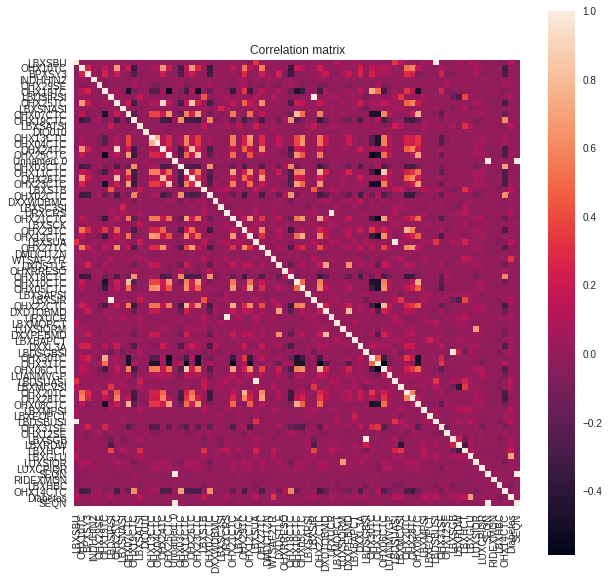

In [311]:
corr = df_model.corr()
plt.figure(figsize=(10,10))
plt.title('Correlation matrix')
sns.heatmap(corr, xticklabels=corr.columns.values,yticklabels=corr.columns.values, square=True)

#Doing the Test Train split

In [312]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [313]:
df_X = pd.DataFrame(X)
df_y = pd.DataFrame(y)

In [314]:
len(X_train)

5952

In [315]:
len(X_test)

1984

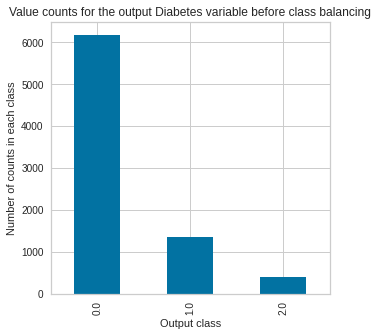

In [316]:
plt.figure(figsize=(5,5))
plt.title('Value counts for the output Diabetes variable before class balancing')
plt.xlabel('Output class')
plt.ylabel('Number of counts in each class')
pd.value_counts(df_y[0]).plot(kind="bar")

In [317]:
np.unique(y_train)

array([0., 1., 2.])

**Data Balancing**

In [318]:
y_train = y_train.astype(int)
y_test = y_test.astype(int)

In [319]:
## Instantiate smote and balance training data only
sm = SMOTE()
X_res, y_res = sm.fit_resample(X_train, y_train)

## Compute and print percentage of high quality wine after balancing
print('Percentage of high quality counts in the balanced data:{}%'.format((y_res==1).sum()/X_res.shape[0]*100))

Percentage of high quality counts in the balanced data:33.33333333333333%


In [320]:
df_X_smote = pd.DataFrame(X_res)
df_y_smote = pd.DataFrame(y_res)

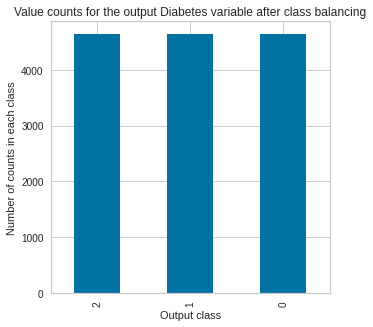

In [321]:
plt.figure(figsize=(5,5))
plt.title('Value counts for the output Diabetes variable after class balancing')
plt.xlabel('Output class')
plt.ylabel('Number of counts in each class')
pd.value_counts(df_y_smote[0]).plot(kind="bar")

*Model Training and Evaluation*

In [322]:
# Define a function that, given a CVGridSearch object, finds the
# percentage difference between the best and worst scores
def find_score_variation(cv_model):
    all_scores = cv_model.cv_results_['mean_test_score']
    return( np.abs((max(all_scores) - min(all_scores))) * 100 / max(all_scores) )

    '''
    which_min_score = np.argmin(all_scores)
    
    all_perc_diff = []
    
    try:
        all_perc_diff.append( np.abs(all_scores[which_min_score - 1] - all_scores[which_min_score])*100 / min(all_scores) )
    except:
        pass
    
    try:
        all_perc_diff.append( np.abs(all_scores[which_min_score + 1] - all_scores[which_min_score])*100 / min(all_scores) )
    except:
        pass
    
    return ( np.mean(all_perc_diff) )
    '''

# Define a function that checks, given a CVGridSearch object,
# whether the optimal parameters lie on the edge of the search
# grid
def find_opt_params_on_edge(cv_model):
    out = False
    
    for i in cv_model.param_grid:
        if cv_model.best_params_[i] in [ cv_model.param_grid[i][0], cv_model.param_grid[i][-1] ]:
            out = True
            break
            
    return out

In [323]:
# Binarize the output
y_res = label_binarize(y_res, classes=[0, 1, 2])
y_test = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_test.shape[1]

In [324]:
data_dict = {}
data_dict['X_train'] = X_res
data_dict['y_train'] = y_res
data_dict['X_test'] = X_test
data_dict['y_test'] = y_test

In [325]:
default_seed = 1

In [326]:
data_dict

{'X_test': array([[-0.42267651, -0.16952254, -0.21839262, ...,  0.23160135,
          0.73315673, -1.71262636],
        [-0.23065861, -0.16952254,  2.59866062, ...,  0.23160135,
         -1.22401044, -1.09715467],
        [-0.23065861, -0.16952254,  0.57038229, ...,  0.23160135,
         -1.55020497, -1.01421877],
        ...,
        [-0.61469442, -0.16952254, -0.10571049, ...,  0.23160135,
         -1.22401044,  0.73791127],
        [-0.23065861, -0.16952254,  0.68306442, ...,  0.23160135,
         -1.22401044, -1.58080193],
        [-0.99873023, -0.16952254,  0.79574655, ...,  0.23160135,
          0.73315673,  1.09802768]]),
 'X_train': array([[-0.23065861, -0.16952254, -0.55643901, ...,  0.23160135,
         -1.22401044,  0.8142996 ],
        [ 0.34539511, -0.16952254, -1.11984966, ...,  0.23160135,
          0.73315673, -0.92037025],
        [ 1.30548465, -0.16952254,  0.79574655, ...,  0.23160135,
         -1.22401044, -1.44373944],
        ...,
        [ 0.99408506, -0.16952254

#Fitting various models

In [327]:
def fit_classification(model, data_dict,
                          cv_parameters = {},
                           metric='f1_micro',
                          model_name = None,
                          n_splits=3,
                          print_to_screen = True):
    '''
    This function will fit a classification model to data and print various evaluation
    measures. It expects the following parameters
      - model: an sklearn model object
      - data_dict: the dictionary containing both training and testing data;
      - cv_parameters: a dictionary of parameters that should be optimized
                       over using cross-validation. Specifically, each named
                       entry in the dictionary should correspond to a parameter,
                       and each element should be a list containing the values
                       to optimize over
      - model_name: the name of the model being fit, for printouts  
      - metric = scoring
    '''
        
    out = {} # output dictionary
    
    # --------------------------
    #   Step 1 - Load the data
    # --------------------------
    X_train = data_dict['X_train']
    y_train = data_dict['y_train']
    
    X_test = data_dict['X_test']
    y_test = data_dict['y_test']  
  
    # --------------------------
    #   Step 2 - Fit the model
    # --------------------------
    # Learn to predict each class against the other
    cv_model = GridSearchCV(OneVsRestClassifier(model, n_jobs=-1), cv_parameters, n_jobs=-1,
                            scoring=metric, cv=n_splits)
    
    start_time = time.time()
    cv_model.fit(X_train, y_train)
    end_time = time.time()
    
    best_model = cv_model.best_estimator_
    
        # Check whether any of the CV parameters are on the edge of
    # the search space
    opt_params_on_edge = find_opt_params_on_edge(cv_model)
    out.update({'search_on_edge':opt_params_on_edge})
    
    # Find out how different the scores are for the different values
    # tested for by cross-validation. If they're not too different, then
    # even if the parameters are off the edge of the search grid, we should be ok
    score_variation = find_score_variation(cv_model)
    out.update({'score_variation':score_variation})
    
    out.update({'all_cv_scores':cv_model.cv_results_['mean_test_score']})
    
    out.update({'model':best_model})
    
    # --------------------------
    #   Step 4 - Print to Screen
    # --------------------------
    if print_to_screen:
        if model_name != None:
            print("=========================================================")
            print("  Model: " + model_name)
            print("=========================================================")
        print("Fit time: " + str(round(end_time - start_time, 2)) + " seconds")
        print("Optimal parameters:")
        print(cv_model.best_params_)
        print("")

        print("Were parameters on edge? : " + str(opt_params_on_edge))
        print("Score variations around CV search grid : " + str(score_variation))
        print( str(cv_model.cv_results_['mean_test_score']) )
    
    return out

In [328]:
def calculate_roc(y_test, y_score, n_classes = 3):
    '''
    Displays ROC Curve
    '''
    out = {}
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        out.update({roc_auc[i]:roc_auc[i]})
        
    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    out.update({roc_auc["micro"]:roc_auc["micro"]})


    # Compute macro-average ROC curve and ROC area
    lw = 2 
    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    plt.figure()
    plt.plot(fpr["micro"], tpr["micro"],
             label='micro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["micro"]),
             color='deeppink', linestyle=':', linewidth=4)

    plt.plot(fpr["macro"], tpr["macro"],
             label='macro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["macro"]),
             color='navy', linestyle=':', linewidth=4)

    colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=lw,
                 label='ROC curve of class {0} (area = {1:0.2f})'
                 ''.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Some extension of Receiver operating characteristic to multi-class')
    plt.legend(loc="lower right")
    plt.show()

**Naive Bayes**

  Model: Naive Bayes Classifier
Fit time: 1.34 seconds
Optimal parameters:
{}

Were parameters on edge? : False
Score variations around CV search grid : 0.0
[0.75180945]


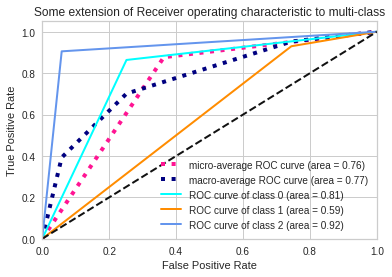

In [292]:
gnb = GaussianNB()
gnb_classifier = fit_classification(gnb, data_dict,{}, model_name = "Naive Bayes Classifier")

best_model = gnb_classifier['model']
y_score = best_model.fit(X_res, y_res).predict(X_test)
y_score.shape
calculate_roc(y_test, y_score, n_classes=3)

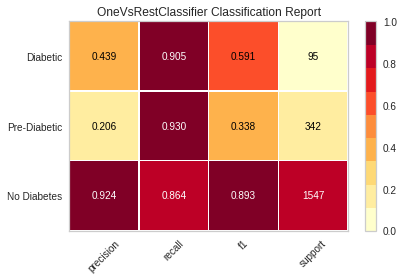

In [293]:
best_model.fit(X_res, y_res) 
y_pred = best_model.predict(X_test) 
target_names = ['No Diabetes', 'Pre-Diabetic', 'Diabetic']
visualizer = ClassificationReport(best_model, classes=target_names, support=True)
visualizer.fit(X_res, y_res)  # Fit the visualizer and the model
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()             # Draw/show/poof the data

**Ridge Classifier**

  Model: Ridge Classifier
Fit time: 3.08 seconds
Optimal parameters:
{'estimator__alpha': 0.0001}

Were parameters on edge? : True
Score variations around CV search grid : 34.084379038882304
[0.29199054 0.28442988 0.28050806 0.28009563 0.27967276 0.27957234
 0.27876731 0.27404459 0.25300083 0.19246738]


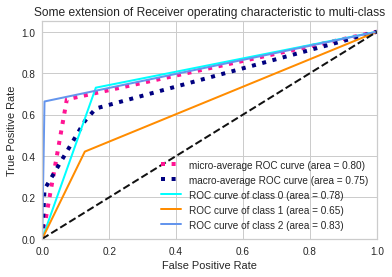

In [333]:
ridge_classifier = RidgeClassifier()
cv_parameters = {"estimator__alpha":np.logspace(-4, 4, num = 10)}

ridge_classifier = fit_classification(ridge_classifier, data_dict, 
                             cv_parameters = cv_parameters, model_name = "Ridge Classifier")
best_model = ridge_classifier['model']
y_score = best_model.fit(X_res, y_res).predict(X_test)
y_score.shape
calculate_roc(y_test, y_score, n_classes=3)

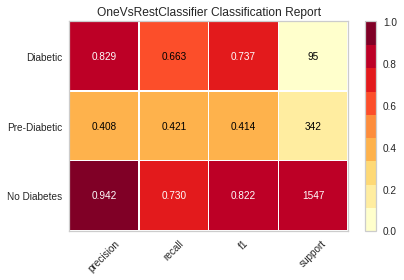

In [334]:
best_model.fit(X_res, y_res) 
y_pred = best_model.predict(X_test) 
target_names = ['No Diabetes', 'Pre-Diabetic', 'Diabetic']
visualizer = ClassificationReport(best_model, classes=target_names, support=True)
visualizer.fit(X_res, y_res)  # Fit the visualizer and the model
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()